Sources: 

https://www.youtube.com/watch?v=pq2jkfJlLmY

This notebook explores the Quantum Fourier Transform (QFT) algorithm. It contains implementations using Qiskit of the QFT and the inverse QFT. After the QFT and iQFT are detailed, a circuit containing both the qft and the iqft afterwards is simulated and executed. This serves to illustrate their dual relationship.

In [57]:
from qiskit import QuantumCircuit
from numpy import pi
import numpy as np

# Standard library imports
import os
import sys

# Start from the current directory
current_dir = os.path.abspath(os.getcwd())

# Traverse up until the target folder is found
target_folder_name = "quantum-information-projects"

while True:
    if os.path.basename(current_dir) == target_folder_name:
        sys.path.append(current_dir)
        print(f"Project root found and added to sys.path: {current_dir}")
        break
    parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
    if parent_dir == current_dir:  # Reached the root of the file system
        print(f"Error: '{target_folder_name}' folder not found.")
        break
    current_dir = parent_dir

Project root found and added to sys.path: c:\Users\arma2\Desktop\Programming Projects\Portfolio_Projects\quantum-information-projects\quantum-information-projects


In [58]:
n = 3
qc = QuantumCircuit(n, n)

for qubit in range(n):
    qc.h(qubit)
    
    for otherqubit in range(qubit + 1, n):
        qc.cp( pi / (2**(otherqubit-qubit)), otherqubit, qubit)
        
# Now reversing the order of the output to match conventions
for qubit in range(n // 2):
    qc.swap(qubit, n - qubit - 1)



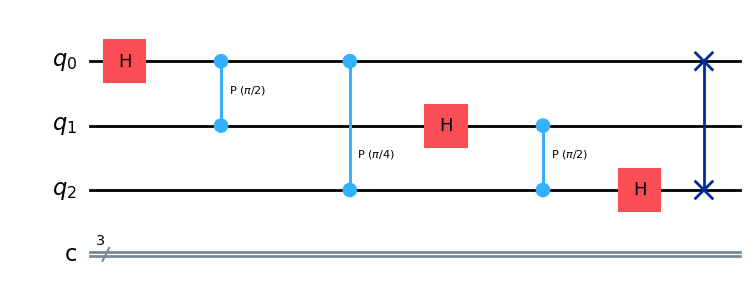

In [59]:
qc.draw('mpl')

In [60]:
def qft(qc, n_qubits):
    for qubit in range(n_qubits):
        qc.h(qubit)
    
        for otherqubit in range(qubit + 1, n_qubits):
            qc.cp( pi / (2**(otherqubit-qubit)), otherqubit, qubit)
        
    # Now reversing the order of the output to match conventions
    for qubit in range(n_qubits // 2):
        qc.swap(qubit, n_qubits - qubit - 1)
        
    return qc

In [61]:
def iqft(qc, n_qubits):

    for qubit in reversed(range(n_qubits)):
        # qc.h(qubit)
    
        for otherqubit in reversed(range(qubit + 1, n_qubits)):
            qc.cp(-1*np.pi / (2**(otherqubit-qubit)), otherqubit, qubit)
        # qc.barrier()
        
        qc.h(qubit)
    
        
    # Now reversing the order of the output to match conventions
    for qubit in range(n_qubits // 2):
        qc.swap(qubit, n_qubits - qubit - 1)
        
    return qc

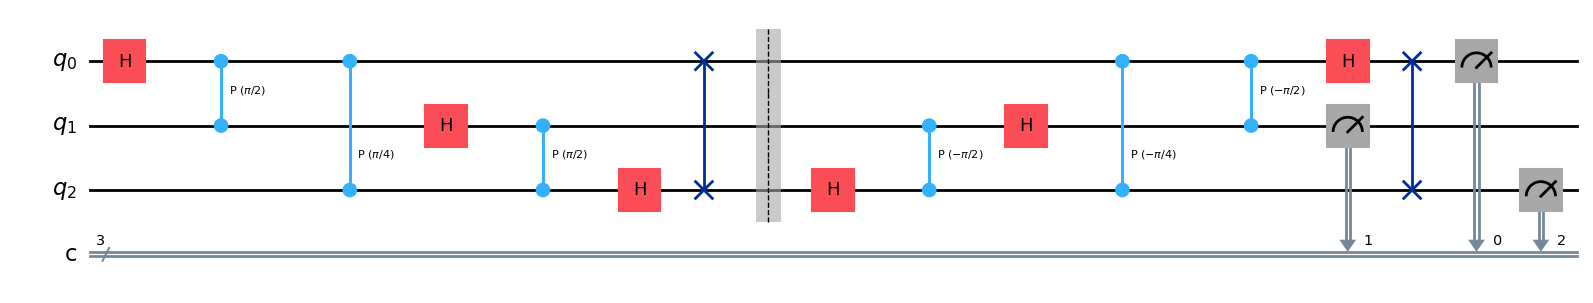

In [62]:
n_qubits = 3
qc_iqft = QuantumCircuit(n_qubits, n_qubits)
qft(qc_iqft, n_qubits);qc_iqft.barrier()

iqft(qc_iqft, n_qubits)

for qubit in range(n_qubits):
    qc_iqft.measure(qubit, qubit)

qc_iqft.draw("mpl")

In [63]:
from src.utils import transpile_qc, run_circuit, create_noise_model

qct = transpile_qc(qc_iqft) # Quantum Circuit Transpiled

ideal_results = run_circuit(qct, shots=1024).get_counts()

noise_m = create_noise_model(p_depol=0.01)
noisy_results = run_circuit(qct, shots=1024, noise_model=noise_m).get_counts()

print(f"Ideal experiment results are: {ideal_results}")
print(f"Noisy experiment results are: {noisy_results}")

Ideal experiment results are: {'000': 1024}
Noisy experiment results are: {'000': 1014, '100': 8, '001': 1, '111': 1}
